# Algorithmic Trading: Case Study

Algorithmic Trading is when people use mathematical algorithms and predefined strategies to trade in the stock market. This way of trading is faster, more efficient and more consistent than manual trading. It’s like you’re playing a game where you need to make quick decisions, and a predefined strategy can help you make those decisions faster and better.

In [24]:
# !pip install numpy
# !pip install pandas
#!pip install seaborn
#!pip install plotly

## Import required libraries

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import warnings

import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.3f}'.format

In [46]:
## Load input data

data = pd.read_csv("../data/aapl.csv")

In [4]:
data.shape

(251, 8)

In [5]:
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-01-21 00:00:00-05:00,163.471,165.370,161.363,161.473,122848900,0.000,0.000
1,2022-01-24 00:00:00-05:00,159.097,161.363,153.807,160.687,162294600,0.000,0.000
2,2022-01-25 00:00:00-05:00,158.063,161.821,156.114,158.858,115798400,0.000,0.000
3,2022-01-26 00:00:00-05:00,162.557,163.441,156.909,158.769,108275300,0.000,0.000
4,2022-01-27 00:00:00-05:00,161.513,162.895,157.367,158.301,121954600,0.000,0.000


## Data Understanding

In [6]:
data.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

*We can observe that the datatype of the Date column is object and can be converted to date*

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          251 non-null    object 
 1   Open          251 non-null    float64
 2   High          251 non-null    float64
 3   Low           251 non-null    float64
 4   Close         251 non-null    float64
 5   Volume        251 non-null    int64  
 6   Dividends     251 non-null    float64
 7   Stock Splits  251 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 15.8+ KB


In [8]:
def dstats(df):
    
    output_df = pd.DataFrame(columns=["Feature","Records","Fill_rate","%Null","dtype","n_unique","sample_data","Nulls"])
    for i in df.columns:
        Feature = i
        dtype = df[i].dtype
        size = df[i].shape[0]
        nulls = df[i].isnull().sum()
        Records = size - nulls
        n_unique = df[i].nunique()
        unique_list = df[i].unique()
        sample_data = unique_list[:3]
        null_percent = round((nulls / size) * 100, 2)
        fill_rate = round(100 - null_percent, 2)
        final_df = pd.DataFrame([[Feature,Records,fill_rate,null_percent,dtype,n_unique,sample_data,nulls]],
            columns=["Feature","Records","Fill_rate","%Null","dtype","n_unique","sample_data","Nulls"])
        output_df = pd.concat([output_df, final_df], ignore_index=True)

    output_df = output_df[["Feature","dtype","Records","Nulls","Fill_rate","%Null","n_unique","sample_data"]]
    return output_df

In [9]:
dstats(data)

,Feature,dtype,Records,Nulls,Fill_rate,%Null,n_unique,sample_data
0,Date,object,251,0,100.000,0.000,251,"[2022-01-21 00:00:00-05:00, 2022-01-24 00:00:0..."
1,Open,float64,251,0,100.000,0.000,251,"[163.47125091657557, 159.09664993875282, 158.0..."
2,High,float64,251,0,100.000,0.000,251,"[165.3702333480158, 161.36349257070873, 161.82..."
3,Low,float64,251,0,100.000,0.000,250,"[161.36348873677323, 153.807340350361, 156.113..."
4,Close,float64,251,0,100.000,0.000,248,"[161.4728546142578, 160.68740844726562, 158.85..."
5,Volume,int64,251,0,100.000,0.000,251,"[122848900, 162294600, 115798400]"
6,Dividends,float64,251,0,100.000,0.000,3,"[0.0, 0.22, 0.23]"
7,Stock Splits,float64,251,0,100.000,0.000,1,[0.0]


*There are no missing values in the data*

In [10]:
data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,251.000,251.000,251.000,251.000,251.000,251.000,251.000
mean,152.212,154.315,150.133,152.296,87085139.044,0.004,0.000
std,13.033,12.930,13.061,13.071,23941686.835,0.029,0.000
min,126.010,127.770,124.170,125.020,35195900.000,0.000,0.000
25%,142.285,144.390,140.194,142.229,70704850.000,0.000,0.000
50%,150.768,153.426,149.113,151.070,82291200.000,0.000,0.000
75%,163.107,165.498,161.007,163.295,96038150.000,0.000,0.000
max,177.746,178.801,175.904,178.154,182602000.000,0.230,0.000


In [47]:
data['Date'] = data.Date.apply(lambda x: datetime.strptime(x[:-6], '%Y-%m-%d %H:%M:%S'))

## Approach 1 - Using momentum strategy

In [48]:
data = data.set_index('Date')

In [49]:
# Calculation of momentum
data['momentum'] = data['Close'].pct_change()

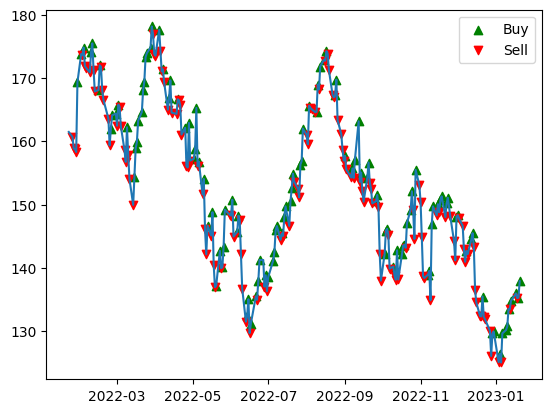

In [64]:
plt.plot(data['Close'])
plt.scatter(data.loc[data['momentum'] > 0].index, data.loc[data['momentum'] > 0]['Close'],label ='Buy', marker='^',color='green')
plt.scatter(data.loc[data['momentum'] < 0].index, data.loc[data['momentum'] < 0]['Close'],label ='Sell', marker='v',color='red')
plt.legend()
plt.show()